### Basic CNN model with tensorflow2 keras api
In this task we will analyze CNN model lenet-5 and layers included at this model

In [1]:
import tensorflow as tf


Usually CNN model consist of groups of convolutional layers, pooling layers and sometimes included dropout layers.

**Convolutional layers** needed for finding features on image. First of all,  image processed with using convolution matrices and create some count of result images, same with number of convolution filters.

<img src="images/conv.gif">

**Pooling layer** is choose element from matrix of 4 pixels in this result images. Considered maximal value is much important, but sometimes other approaches are used.

| MaxPooling | AveragePooling |
| :--:  | :--: |
| <img src="images/maxpooling.png"> | <img src="images/avgpooling.png"> |

**Dropout layer** by chance "turn off" specified percent of neurons for each learning iteration.
Dropout its industry standard regularization method for neural networks.

<img src="images/dropout.png">

"Dropout makes our big network act like a little one by randomly training
little subsections of the network at a time, and little networks don't overfit." - Grokking Deep Learning, p. 154.

Why does it work?
Initial condition of neural networks selected randomly. Its mean every neural network learns differently.
Therefore, they study general patterns and various noise.
After voting, they can reject noise and only common signal stay.
Dropout makes some small neural network from one large.

Look at Lenet-5 model

<img src="images/lenet5.png">

Lenet model consists of two cnvolutional layers, two pulling (sub-sampling), two fully connected layers and output layer.
Lenet-5 model doesn't have Dropout layer.

Lets create Lenet-5 model with previously considered layers

In [2]:
# create new model
model = tf.keras.Sequential()

# Convolutional layer
# Basic parameters for Conv2D layer:
# - filters - number of output filters in the convolution (dimensionality of the output space)
# - kernel_size - size of convolution kernel
# - strides - strides of the convolution along the height and width
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))

# Pooling layer
model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D())

# Flattern layer - A flatten operation on a tensor reshapes the tensor
# to have the shape that is equal to the number of elements contained in tensor non including the batch dimension
model.add(tf.keras.layers.Flatten())

# Fully connected layers
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

# shows model description
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

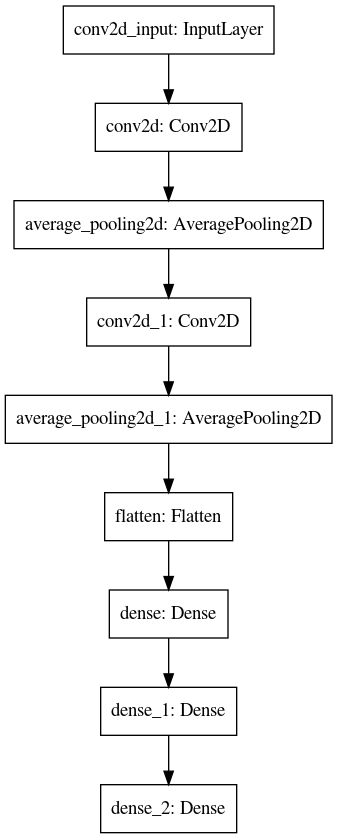

In [6]:
# You can visualize Your model  
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)